#Standard NMF

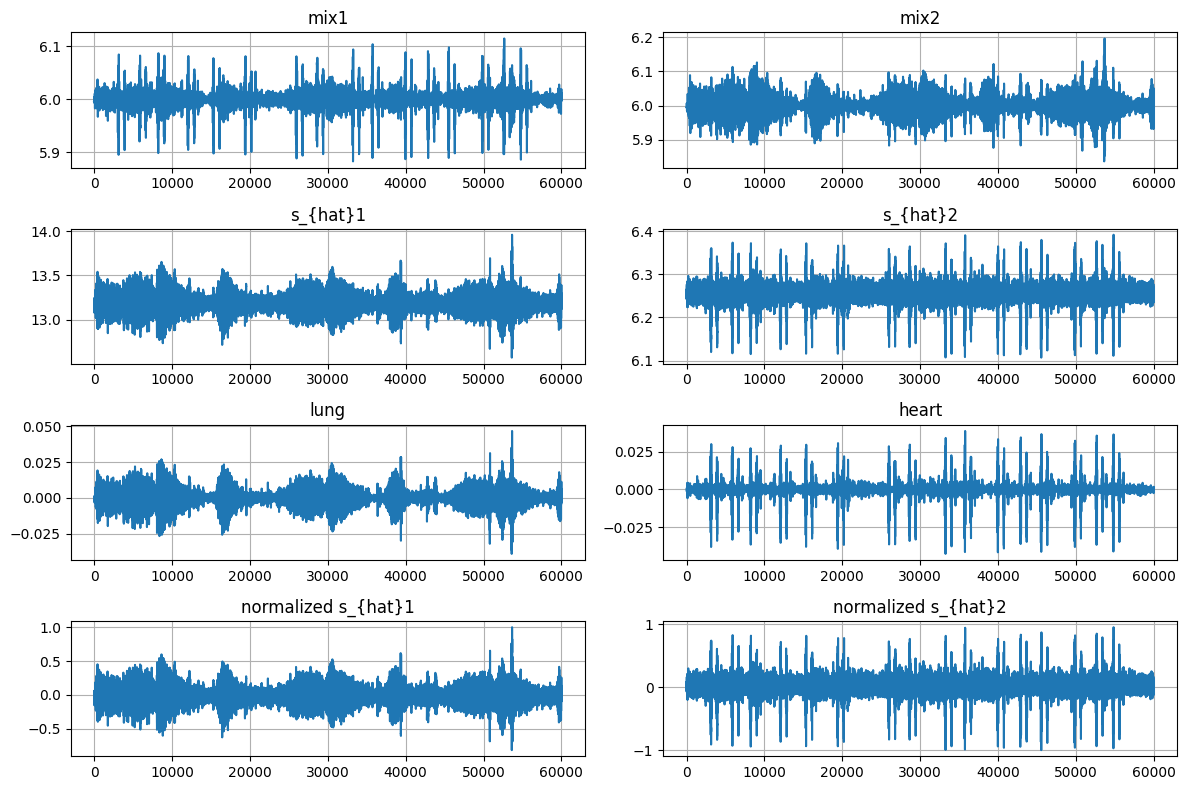

SIR: [ 9.7291084  14.19945105]
SDR: [5.63660296 9.92464558]
SAR: [ 8.22055447 12.11887261]


In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from scipy.signal import periodogram

def standard_nmf(Y, options, X, type, fs):
    np.random.seed(45)
    model = NMF(n_components=options['J'], init='random', max_iter=options['niter'])
    W = model.fit_transform(Y.T)
    H = model.components_

    return H, W.T

# Define sample rates and dimensions for demonstration
fs = 800  # Example sample rate

Y = 5 * np.dot(A, X) + 6  # Mixed signals with some added noise

options = {
    'J': 2,
    'niter': 1000,
    'verbose': 0,
}

AH, XH = standard_nmf(Y, options, X, 1, fs)

# Plotting
plt.figure(figsize=(12, 8))
titles = ['mix1', 'mix2', 's_{hat}1', 's_{hat}2', 'lung', 'heart', 'normalized s_{hat}1', 'normalized s_{hat}2']
data = [Y[0, :], Y[1, :], XH[0, :], XH[1, :], X[1, :], X[0, :], XH[0, :], XH[1, :]]

for i in range(8):
    plt.subplot(4, 2, i + 1)
    if i >= 6:  # Normalize last two plots
        data[i] -= np.mean(data[i])
        data[i] /= np.max(np.abs(data[i]))
    plt.plot(data[i])
    plt.title(titles[i])
    plt.grid(True)

plt.tight_layout()
plt.show()
sdr, sir, sar, _ = mir_eval.separation.bss_eval_sources(X, XH)
# Output the results
print("SIR:", sir)
print("SDR:", sdr)
print("SAR:", sar)

#Alpha NMF

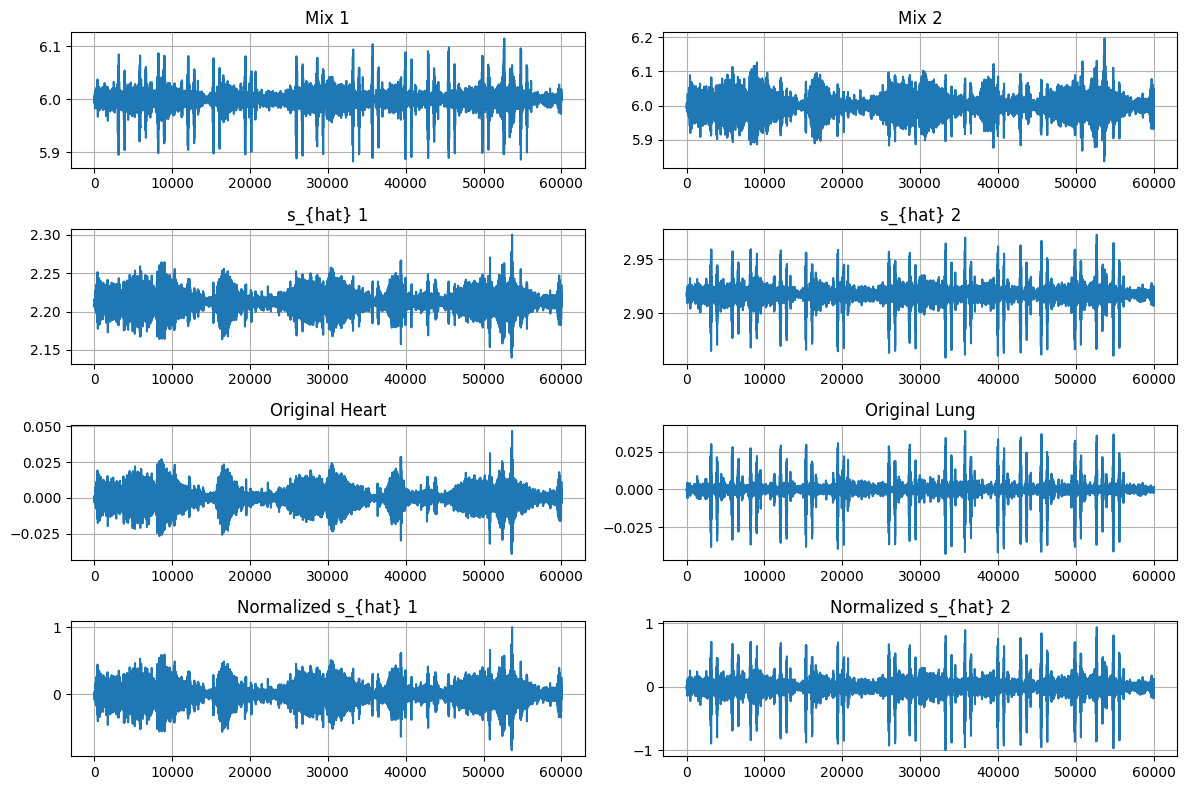

SIR: [8.2677514  8.76561955]
SDR: [8.26775032 8.7656155 ]
SAR: [74.92176787 69.61854098]


In [221]:
import numpy as np
import librosa
from sklearn.decomposition import NMF
import mir_eval

# Load data
y1, fs1 = librosa.load('M_AF_LC.wav', sr=None)
y2, fs2 = librosa.load('M_W_RLA.wav', sr=None)

# Ensure the sample rates match
if fs1 != fs2:
    y2 = librosa.resample(y2, orig_sr=fs2, target_sr=fs1)

# Trim to the shortest length
min_length = min(len(y1), len(y2))
h = y1[:min_length]
l = y2[:min_length]

# Create matrix X of stacked signals
X = np.vstack([h, l])

# Assume A is some mixing matrix

# Perform matrix operation as per your specification
Y = 5 * np.dot(A, X) + 6  # Applies your specific transformation
# Set your options with specific alpha values for W and H
options = {'J': 2, 'niter': 2000, 'init': 'random', 'alpha_H': 0.0001}

# Function to perform NMF and calculate metrics using mir_eval
def perform_nmf(Y, options, X, fs):
    np.random.seed(22)
    model = NMF(n_components=options['J'], init=options['init'], max_iter=options['niter'],
             alpha_H=options['alpha_H'])
    W = model.fit_transform(Y.T)
    H = model.components_

    # Reconstruct the signals from the components
    reconstructed_signals = np.dot(W, H)
    return H, W.T

# Perform NMF and evaluate separation quality
H, XH = perform_nmf(Y, options, X, fs1)

import matplotlib.pyplot as plt
import numpy as np

# Assuming Y, XH, and X are defined as follows:
# Y = 5 * np.dot(A, X) + 6 from your NMF processing
# XH = reconstructed signals from NMF
# X = original signals matrix

# Prepare the titles and data for plotting
titles = ['Mix 1', 'Mix 2', 's_{hat} 1', 's_{hat} 2', 'Original Heart', 'Original Lung', 'Normalized s_{hat} 1', 'Normalized s_{hat} 2']
data = [Y[0, :], Y[1, :], XH[0, :], XH[1, :], X[1, :], X[0, :], XH[0, :], XH[1, :]]

plt.figure(figsize=(12, 8))

for i in range(8):
    plt.subplot(4, 2, i + 1)
    if i >= 6:  # Normalize the last two plots
        data[i] -= np.mean(data[i])  # subtract the mean
        data[i] /= np.max(np.abs(data[i]))  # divide by the maximum absolute value for normalization
    plt.plot(data[i])
    plt.title(titles[i])
    plt.grid(True)

plt.tight_layout()
plt.show()
sdr, sir, sar, _ = mir_eval.separation.bss_eval_sources(X, XH)
# Output the results
print("SIR:", sir)
print("SDR:", sdr)
print("SAR:", sar)

# PL NMF (MATLAB)

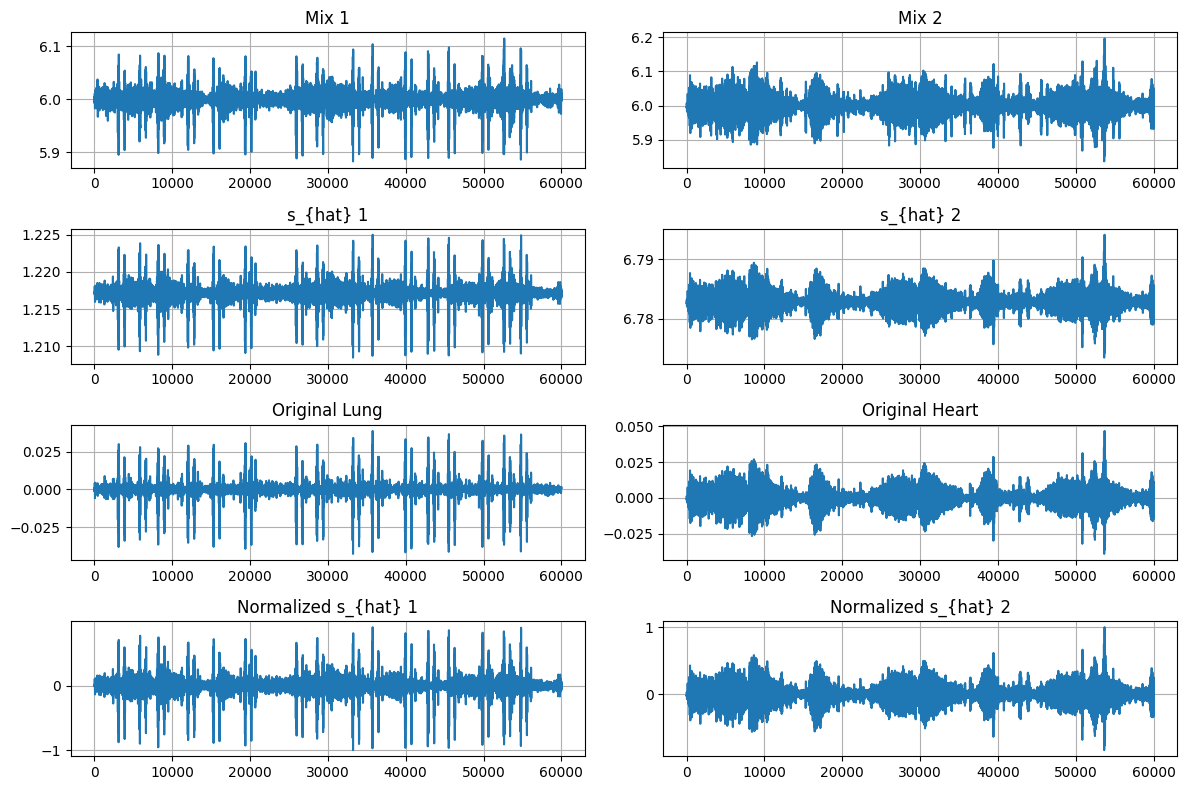

SIR: [ 7.93405717 13.74503906]
SDR: [ 7.93405717 13.74503903]
SAR: [111.42082433  95.60150654]


In [174]:
import scipy.io
import numpy as np

# Load the data from .mat files
XH_mat = scipy.io.loadmat('XH_Mohawk.mat')


# Assuming 'X' and 'XH' are the variable names inside the .mat files
XH = XH_mat['XH']  # adjust the key according to how it's stored in the MAT-file

import matplotlib.pyplot as plt
import numpy as np

# Assuming Y, XH, and X are defined as follows:
# Y = 5 * np.dot(A, X) + 6 from your NMF processing
# XH = reconstructed signals from NMF
# X = original signals matrix

# Prepare the titles and data for plotting
titles = ['Mix 1', 'Mix 2', 's_{hat} 1', 's_{hat} 2', 'Original Lung', 'Original Heart', 'Normalized s_{hat} 1', 'Normalized s_{hat} 2']
data = [Y[0, :], Y[1, :], XH[0, :], XH[1, :], X[0, :], X[1, :], XH[0, :], XH[1, :]]

plt.figure(figsize=(12, 8))

for i in range(8):
    plt.subplot(4, 2, i + 1)
    if i >= 6:  # Normalize the last two plots
        data[i] -= np.mean(data[i])  # subtract the mean
        data[i] /= np.max(np.abs(data[i]))  # divide by the maximum absolute value for normalization
    plt.plot(data[i])
    plt.title(titles[i])
    plt.grid(True)

plt.tight_layout()
plt.show()
sdr, sir, sar, _ = mir_eval.separation.bss_eval_sources(X, XH)
# Output the results
print("SIR:", sir)
print("SDR:", sdr)
print("SAR:", sar)

#Lingo NMF

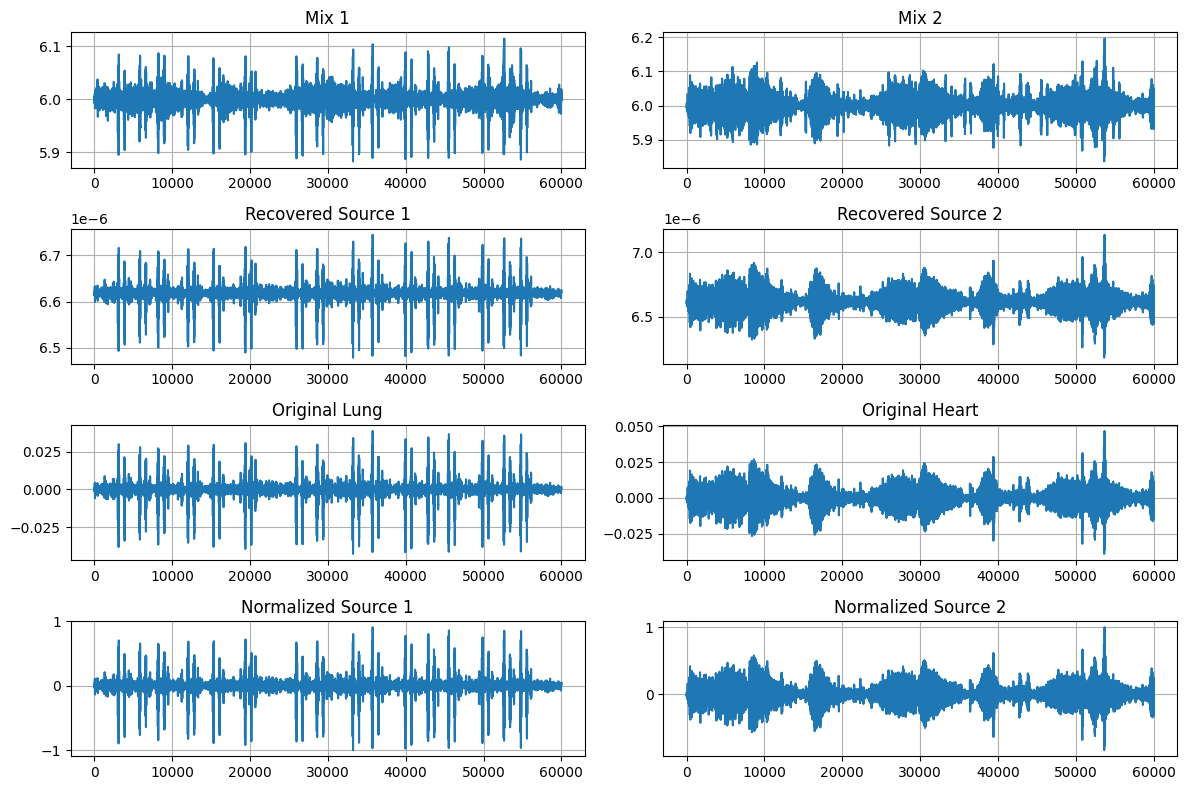

SIR: [18.64567927 32.58046996]
SDR: [18.64567926 32.58046789]
SAR: [105.2055357  95.7969948]


In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Custom NMF with Fundamental Frequency (F0) Penalty
def nmf_with_f0_penalty(Y, options, X, fs):
    """
    Implements NMF with an added penalty for fundamental frequency deviation.
    """

    # Initialize matrices (random non-negative values)
    np.random.seed(42)
    J, T = Y.shape
    W = np.random.randn(J, options['J'])+0.5  # Basis matrix
    H = np.random.randn(options['J'], T)+10  # Coefficients matrix

    # Define target fundamental frequencies (for heart and lung sounds)
    target_f0 = np.array([0.5, 0.05])  # Hz (example values for heart & lung)
    lambda_f0 = np.array([0.001, 0.001])  # Different penalties for heart & lung
    alpha=0.5

    # Perform Iterative Multiplicative Updates with F0 Penalty
    for _ in range(options['niter']):
        WH = W @ H + 1e-10  # Avoid division by zero

        # Compute the fundamental frequency for each source
        f0_weights = np.array([estimate_f0(H[i, :], fs) for i in range(H.shape[0])])
        f0_weights = np.nan_to_num(f0_weights, nan=0)  # Handle NaNs

        # Compute F0 penalty term (difference squared)
        f0_penalty = np.sum(lambda_f0 * (f0_weights - target_f0) ** 2)

        # Update W and H with the cost function including F0 penalty
        W *= (Y @ H.T) / (W @ (H @ H.T) +f0_penalty)**alpha
        H *= (W.T @ Y) / ((W.T @ W) @ H +f0_penalty)

    return W, H, f0_penalty

# Function to estimate the fundamental frequency (F0)
def estimate_f0(signal, fs, f_min=0.1, f_max=100.0):
    """
    Estimates the fundamental frequency of a signal.
    """
    f, Pxx = periodogram(signal, fs=fs)
    valid_mask = (f >= f_min) & (f <= f_max)  # Restrict to plausible frequencies
    return f[valid_mask][np.argmax(Pxx[valid_mask])] if np.any(valid_mask) else None

# Example Simulation
np.random.seed(100)
fs = 800  # Sampling frequency

# Generate a random mixing matrix and synthetic signals
#A = np.random.rand(2, 2)
#X = np.abs(np.random.randn(2, 1000))  # 2 sources, 1000 time points
Y = 5 * np.dot(A, X) + 6  # Mixed signals

# Define NMF options
options = {
    'J': 2,  # Number of components
    'niter': 1000
}

# Apply NMF with F0 penalty
W, H, f0_penalty = nmf_with_f0_penalty(Y, options, X, fs)

# Plot Results
plt.figure(figsize=(12, 8))
titles = ['Mix 1', 'Mix 2', 'Recovered Source 1', 'Recovered Source 2', 'Original Lung', 'Original Heart', 'Normalized Source 1', 'Normalized Source 2']
data = [Y[0, :], Y[1, :], H[0, :], H[1, :], X[0, :], X[1, :], H[0, :], H[1, :]]

for i in range(8):
    plt.subplot(4, 2, i + 1)
    if i >= 6:  # Normalize last two plots
        data[i] -= np.mean(data[i])
        data[i] /= np.max(np.abs(data[i]))
    plt.plot(data[i])
    plt.title(titles[i])
    plt.grid(True)

plt.tight_layout()
plt.show()

sdr, sir, sar, _ = mir_eval.separation.bss_eval_sources(X, XH)
# Output the results
print("SIR:", sir)
print("SDR:", sdr)
print("SAR:", sar)


## Citation:
If you use this code in your research, please cite:

- Torabi, Yasaman; Shirani, Shahram; Reilly, James P. (2025), Large Language Model-based Nonnegative Matrix Factorization For Cardiorespiratory Sound Separation, arXiv preprint, https://doi.org/10.48550/arXiv.2502.05757.
- Torabi, Yasaman; Shirani, Shahram; Reilly, James P. (2023), A New Non-Negative Matrix Factorization Approach for Blind Source Separation of Cardiovascular and Respiratory Sound Based on the Periodicity of Heart and Lung Function, arXiv preprint, https://doi.org/10.48550/arXiv.2305.01889.


If you use this dataset in your research, please cite:
- Torabi, Yasaman; Shirani, Shahram; Reilly, James P. (2024),
Manikin-Recorded Cardiopulmonary Sounds Dataset Using Digital Stethoscope,
arXiv preprint, https://doi.org/10.48550/arXiv.2410.03280

© 2025 by Yasaman Torabi. All rights reserved.